In [1]:
import os
import sys
import pandas as pd
import numpy as np 
import requests

from io import BytesIO
from glob import glob
from PIL import Image, ImageEnhance

In [2]:
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from PIL import ImageColor
import colorsys

In [3]:
model_dict = {
    "KMeans": KMeans,
#     "BisectingKMeans" : BisectingKMeans,
    "GaussianMixture": GaussianMixture,
    "MiniBatchKMeans": MiniBatchKMeans,
}

center_method = {
    "KMeans": "cluster_centers_",
#     "BisectingKMeans" : "cluster_centers_",
    "GaussianMixture": "means_",
    "MiniBatchKMeans": "cluster_centers_",
}

n_cluster_arg = {
    "KMeans": "n_clusters",
#     "BisectingKMeans" : "n_clusters",
    "GaussianMixture": "n_components",
    "MiniBatchKMeans": "n_clusters",

}

In [4]:
img = Image.open("sample1.jpg") 

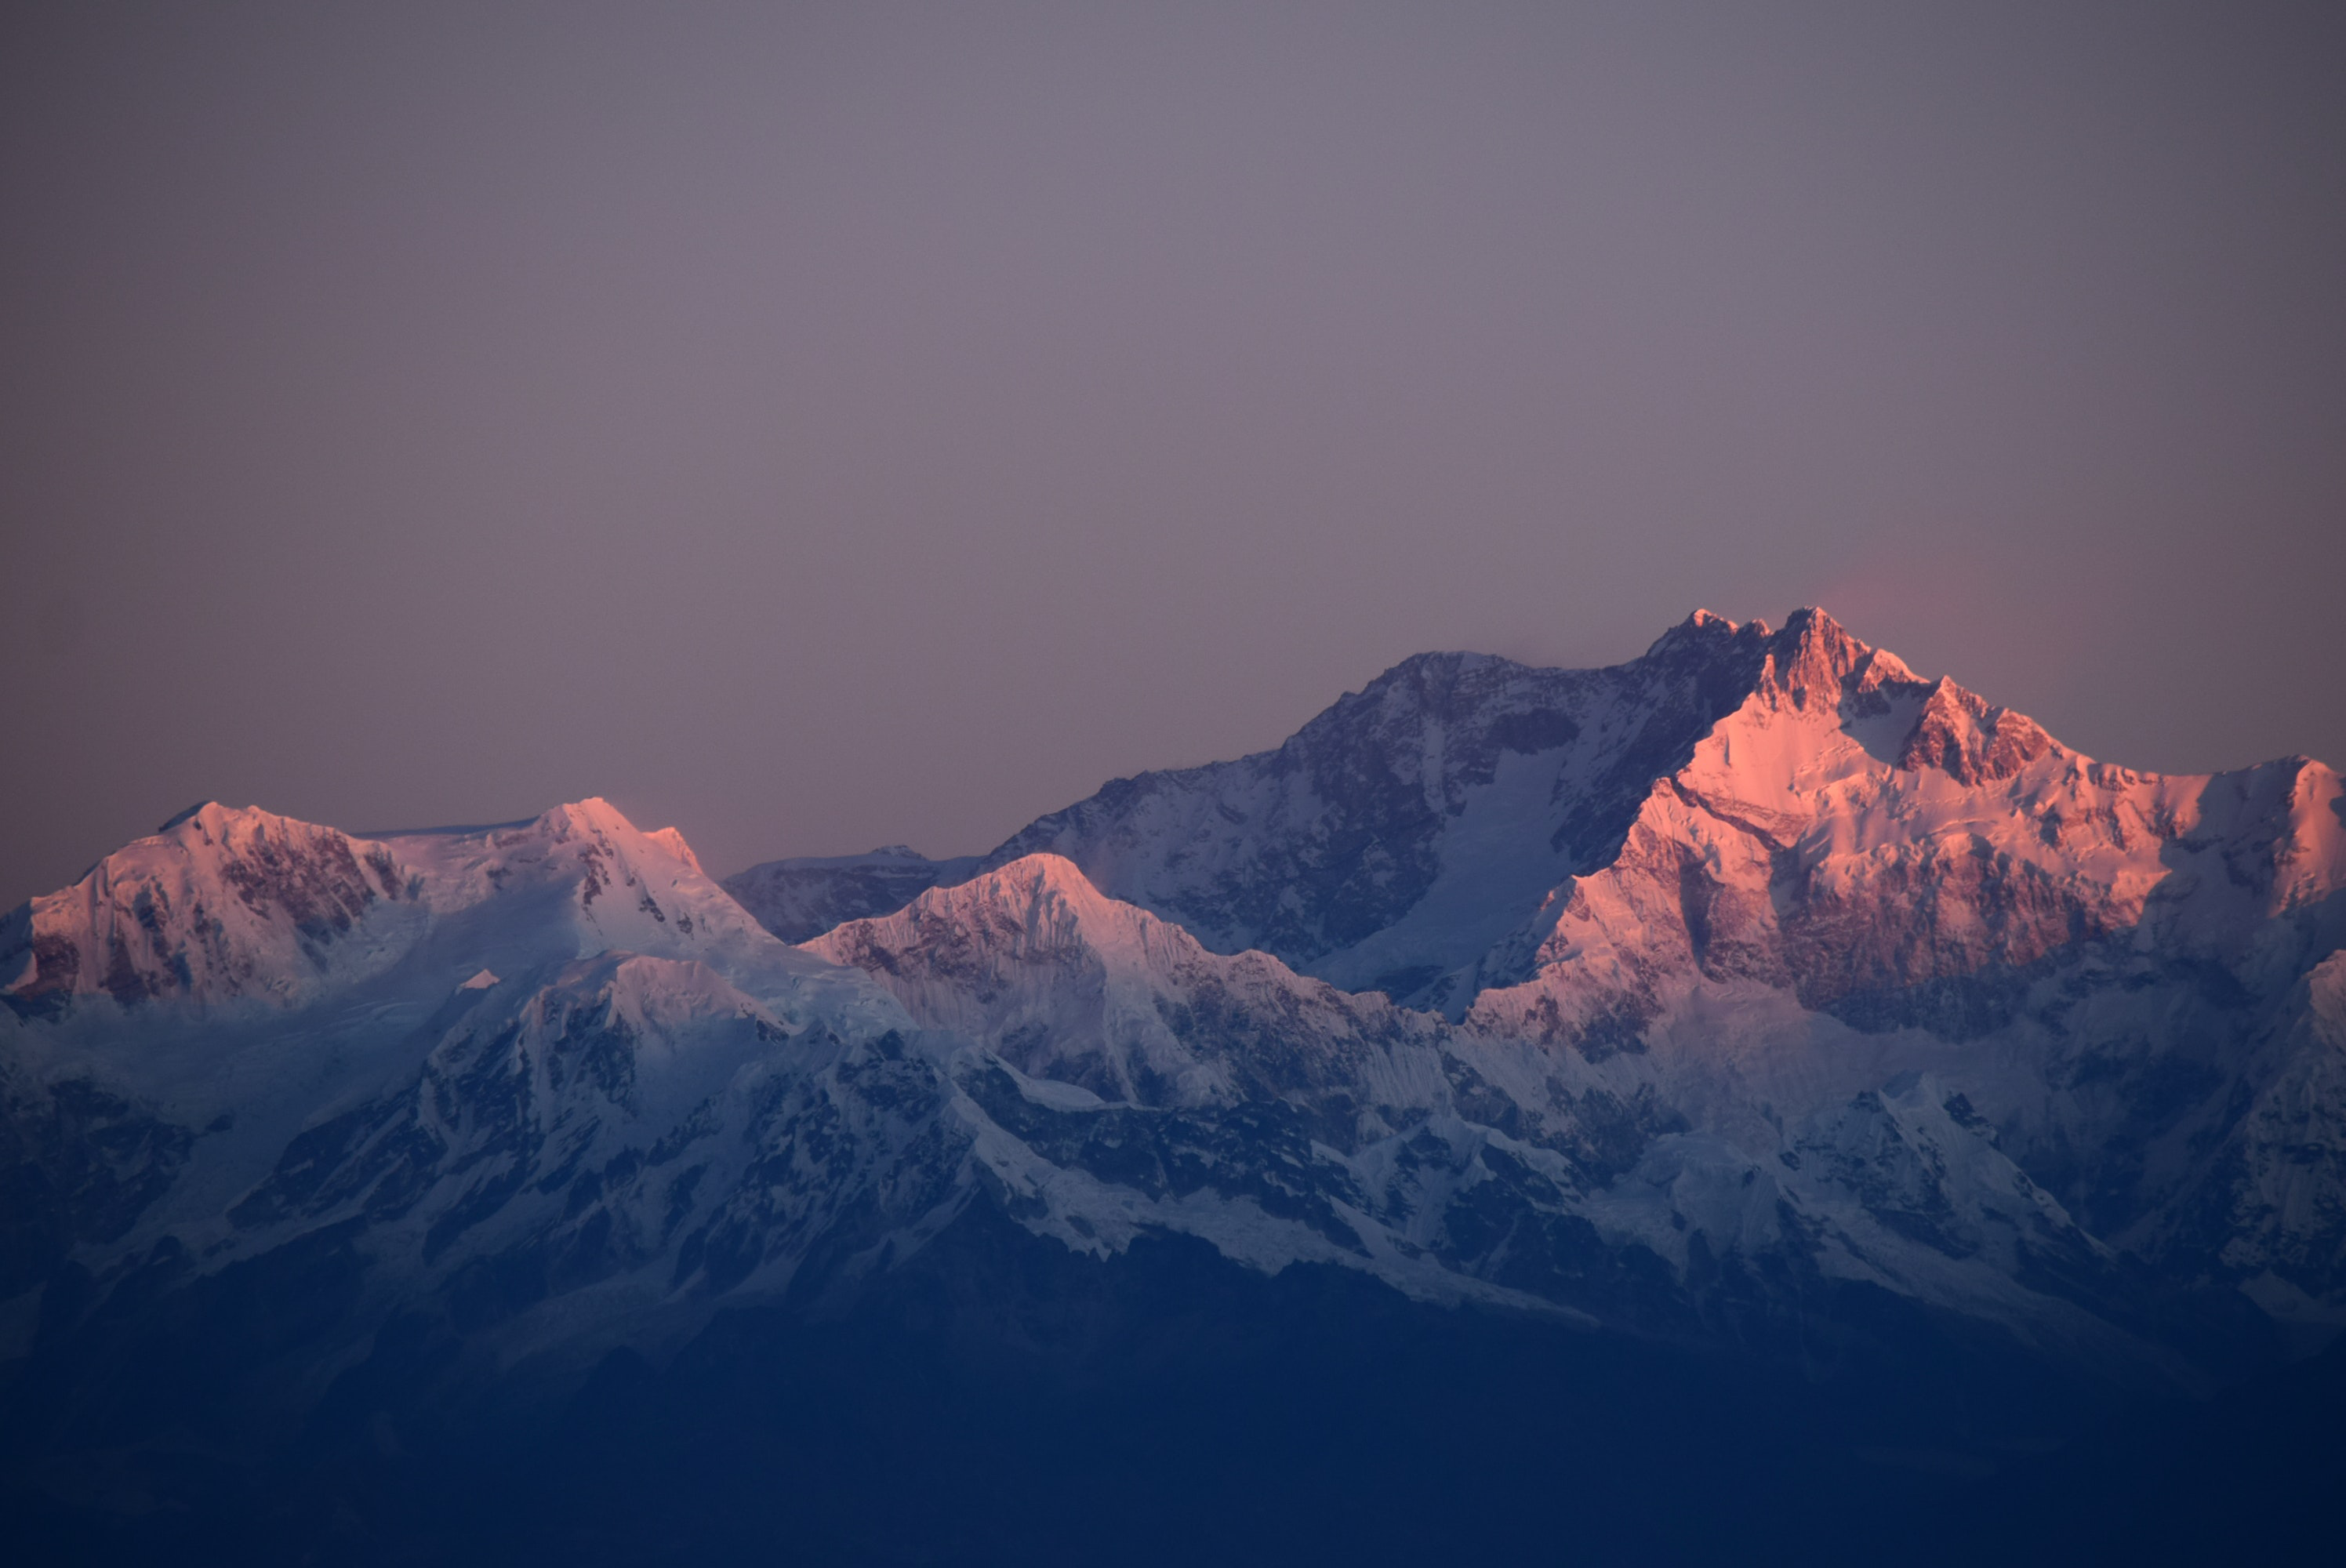

In [35]:
img

In [6]:
# convert RGBA to RGB if necessary
n_dims = np.array(img).shape[-1]

In [7]:
n_dims # RGB -> has 3 channels

3

In [8]:
# Convert RGBA to RGB

if n_dims == 4:
    background = Image.new("RGB", img.size, (255, 255, 255))
    background.paste(img, mask=img.split()[3]) # 3 is the alpha channel
    img = background

In [9]:
r,g,b = np.array(img).reshape(-1,n_dims).T

In [10]:
df = pd.DataFrame({"R": r, "G": g, "B": b}).sample(n=1000)

In [11]:
df

R    G    B
5559669    8   30   67
23572     92   88  103
4374610   28   47   79
3956130   50   67   97
1393266  125  114  130
...      ...  ...  ...
5125937   20   40   75
5946145    5   33   70
1204403  127  116  130
1234706  125  114  130
174657   119  112  128

[1000 rows x 3 columns]

In [12]:
model_name = "KMeans"
palette_size = 5
sort_func="random"

params = {n_cluster_arg[model_name]: palette_size}
model = model_dict[model_name](**params)

In [13]:
clusters = model.fit_predict(df)

In [14]:
palette = getattr(model, center_method[model_name]).astype(int).tolist()

In [15]:
palette

[[94, 85, 100], [10, 33, 70], [121, 109, 123], [204, 117, 116], [48, 60, 92]]

In [16]:
# palette.sort(key=lambda rgb: sort_func_dict[sort_func.rstrip("_r")](*rgb),
#              reverse=bool(sort_func.endswith("_r")))

In [17]:
# palette

In [18]:
palette.sort(key=lambda rgb: (lambda r, g, b : colorsys.rgb_to_hsv(r, g, b))(*rgb))

In [19]:
palette

[[204, 117, 116], [10, 33, 70], [48, 60, 92], [94, 85, 100], [121, 109, 123]]

In [20]:
sort_func_dict = {
    "rgb": (lambda r,g,b: (r, g, b)),
    "hsv": (lambda r, g, b : colorsys.rgb_to_hsv(r, g, b))
}

In [21]:
# palette.sort(key=lambda rgb: print(rgb))

In [37]:
tuple(palette[0])

(204, 117, 116)

In [23]:
def rgb_to_hex(r, g, b):
    return '#{:02x}{:02x}{:02x}'.format(r, g, b)

In [24]:
rgb_to_hex(11, 34, 70)

'#0b2246'

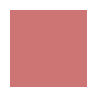

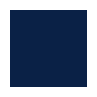

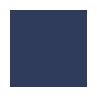

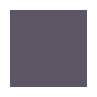

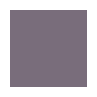

In [66]:
import matplotlib.pyplot as plt

for each_rgb_col in palette: 
    plt.figure(figsize=(1, 1))
    plt.imshow([[tuple(each_rgb_col)]])
    plt.axis("off")
    plt.show()

In [60]:
import plotly.express as px
import numpy as np
img_rgb = np.array([palette], dtype=np.uint8)
fig = px.imshow(img_rgb)
fig.update_layout
fig.show()

In [72]:
import seaborn as sns
sns.set_palette(['#0b2246', 'blue'])

In [73]:
sns.color_palette()

[(0.043137254901960784, 0.13333333333333333, 0.27450980392156865),
 (0.0, 0.0, 1.0)]

In [79]:
list_hex = []

for each_rgb_col in palette:
    list_hex.append(rgb_to_hex(each_rgb_col[0], each_rgb_col[1], each_rgb_col[2]))

In [80]:
list_hex

['#cc7574', '#0a2146', '#303c5c', '#5e5564', '#796d7b']

In [81]:
sns.set_palette(list_hex)

In [82]:
sns.color_palette()

[(0.8, 0.4588235294117647, 0.4549019607843137),
 (0.0392156862745098, 0.12941176470588237, 0.27450980392156865),
 (0.18823529411764706, 0.23529411764705882, 0.3607843137254902),
 (0.3686274509803922, 0.3333333333333333, 0.39215686274509803),
 (0.4745098039215686, 0.42745098039215684, 0.4823529411764706)]

In [92]:
a = list(range(0, 10))
b = np.random.rand(10)

<AxesSubplot:>

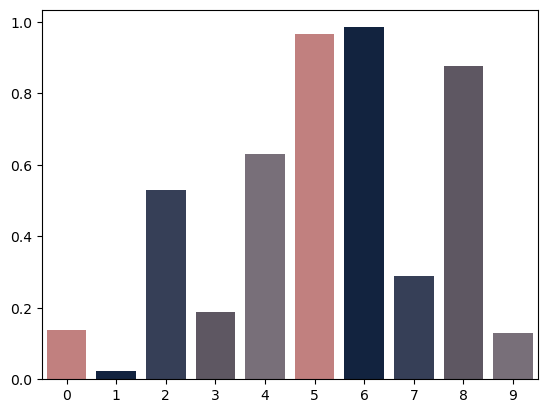

In [98]:
sns.barplot(x=a, 
            y=b,
            palette=sns.color_palette()
           )